In [1]:
import re
import pandas as pd
import collections
import os
def read_o(file_path):
    with open(file_path,encoding='gbk') as f:
        lines = f.readlines()
    instruction_pattern = re.compile(r'^\s*\w+:\s+(?:[\da-f]{2}\s+)+\s+(\w+\s+.+)$', re.MULTILINE)
    temp = []
    for line in lines:
        # print(line)
        match1 = instruction_pattern.search(line)
        if  match1:
            instruction = match1.group(1)
            # print(instruction.split()[0])
            temp.append(instruction.split()[0])
    dict1 = collections.Counter(temp)
    dict1['version'] = file_path.split('_')[2][:2]
    return dict1

In [2]:
def read_o_2(filename):
    with open(filename, 'rb') as file:
        exe_content = file.read()
    # 输出前100个字节的十六进制表示
    text = exe_content.hex().upper()
    dict_o = dict(collections.Counter(text))
    return dict_o

In [3]:
def crate_o_dict(file_path):
    o_list = []
    file_name = os.listdir(file_path)
    for file in file_name:
        o_dict = read_o(file_path+'/'+file)
        o_dict.update(read_o_2(file_path+'/'+file))
        o_list.append(o_dict)
    return o_list

In [4]:
a = crate_o_dict('o_txt')

In [5]:
data = pd.DataFrame.from_dict(a).fillna(0)

In [6]:
data.to_csv('o_data.csv',index=False)

In [7]:
data

,lea,and,push,mov,sub,call,movl,test,js,add,...,8,B,F,E,1,9,jns,movsbl,cmpb,sete
0,126,1,50,571,88,145,133,34,2.0,61,...,5201,262,1271,614,2940,4911,0.0,0.0,0.0,0.0
1,126,1,50,571,88,145,133,34,2.0,61,...,5201,262,1271,614,2939,4911,0.0,0.0,0.0,0.0
2,126,1,50,571,88,145,133,34,2.0,61,...,5201,262,1271,614,2939,4911,0.0,0.0,0.0,0.0
3,126,1,50,571,88,145,133,34,2.0,61,...,5201,262,1271,614,2940,4911,0.0,0.0,0.0,0.0
4,126,1,50,571,88,145,133,34,2.0,61,...,5201,262,1271,614,2939,4911,0.0,0.0,0.0,0.0
5,126,1,50,571,88,145,133,34,2.0,61,...,5201,262,1271,614,2939,4911,0.0,0.0,0.0,0.0
6,126,1,50,571,88,145,133,34,2.0,61,...,5202,262,1271,614,2939,4911,0.0,0.0,0.0,0.0
7,126,1,50,571,88,145,133,34,2.0,61,...,5202,262,1271,614,2939,4911,0.0,0.0,0.0,0.0
8,126,1,50,553,88,145,133,29,2.0,61,...,5163,262,1266,631,2899,4857,0.0,0.0,0.0,0.0
9,126,1,50,553,88,145,133,29,2.0,61,...,5163,262,1266,631,2899,4857,0.0,0.0,0.0,0.0


In [8]:
data = data.loc[:, (data != data.iloc[0]).any()]

In [9]:
data

,lea,push,mov,sub,call,movl,test,js,add,jmp,...,8,B,F,E,1,9,jns,movsbl,cmpb,sete
0,126,50,571,88,145,133,34,2.0,61,22,...,5201,262,1271,614,2940,4911,0.0,0.0,0.0,0.0
1,126,50,571,88,145,133,34,2.0,61,22,...,5201,262,1271,614,2939,4911,0.0,0.0,0.0,0.0
2,126,50,571,88,145,133,34,2.0,61,22,...,5201,262,1271,614,2939,4911,0.0,0.0,0.0,0.0
3,126,50,571,88,145,133,34,2.0,61,22,...,5201,262,1271,614,2940,4911,0.0,0.0,0.0,0.0
4,126,50,571,88,145,133,34,2.0,61,22,...,5201,262,1271,614,2939,4911,0.0,0.0,0.0,0.0
5,126,50,571,88,145,133,34,2.0,61,22,...,5201,262,1271,614,2939,4911,0.0,0.0,0.0,0.0
6,126,50,571,88,145,133,34,2.0,61,22,...,5202,262,1271,614,2939,4911,0.0,0.0,0.0,0.0
7,126,50,571,88,145,133,34,2.0,61,22,...,5202,262,1271,614,2939,4911,0.0,0.0,0.0,0.0
8,126,50,553,88,145,133,29,2.0,61,22,...,5163,262,1266,631,2899,4857,0.0,0.0,0.0,0.0
9,126,50,553,88,145,133,29,2.0,61,22,...,5163,262,1266,631,2899,4857,0.0,0.0,0.0,0.0


In [10]:
from sklearn import svm #svm导入
from sklearn import tree

In [11]:
conlum_list = data.columns.tolist() #分离特征和目标值
conlum_list.remove('version')
features = data[conlum_list] #特征
target = data['version'] # 什么版本

In [12]:
# pca
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
features = pca.fit_transform(features)

In [13]:
features = pd.DataFrame(features)

In [14]:
model = svm.SVC(C=1.0, kernel='rbf', gamma=1/200, coef0=0.0, shrinking=False, 
                probability=False, tol=0.001, cache_size=200, class_weight=None, 
                verbose=False, max_iter=-1, decision_function_shape='ovo', 
                random_state=None)

model.fit(features, target) # 训练模型

SVC(decision_function_shape='ovo', gamma=0.005, shrinking=False)

In [15]:
print(model.predict(features))
(target==model.predict(features)).mean()# 预测

['06' '06' '06' '07' '07' '07' '08' '08' '09' '09' '10' '10' '11' '11'
 '12' '12' '12' '06' '06' '06' '07' '07' '07' '08' '08' '09' '09' '10'
 '10' '11' '11' '12' '12' '13']


0.9705882352941176

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, model.predict(features))

array([[6, 0, 0, 0, 0, 0, 0, 0],
       [0, 6, 0, 0, 0, 0, 0, 0],
       [0, 0, 4, 0, 0, 0, 0, 0],
       [0, 0, 0, 4, 0, 0, 0, 0],
       [0, 0, 0, 0, 4, 0, 0, 0],
       [0, 0, 0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 0, 0, 4, 0],
       [0, 0, 0, 0, 0, 0, 1, 1]], dtype=int64)

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

[[1.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.5]]


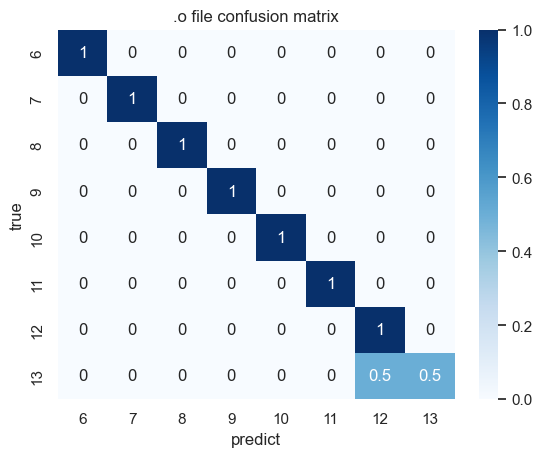

In [18]:
def plot(matrix):
  sns.set()
  f,ax=plt.subplots()
  print(matrix) #打印出来看看
  sns.heatmap(matrix,annot=True,cmap="Blues",ax=ax) #画热力图
  ax.set_title('.o file confusion matrix') #标题
  ax.set_xticklabels(['6','7','8','9','10','11','12','13'])
  ax.set_yticklabels(['6','7','8','9','10','11','12','13'])
  ax.set_xlabel('predict') #x轴
  ax.set_ylabel('true') #y轴

matrix=confusion_matrix(target, model.predict(features))
matrix=matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]  
con_mat_norm = np.around(matrix, decimals=2)
plot(con_mat_norm)# 画比例数据

In [20]:
from sklearn.metrics import accuracy_score, classification_report
print('Classification Report:\n', classification_report(target, model.predict(features)))

Classification Report:
               precision    recall  f1-score   support

          06       1.00      1.00      1.00         6
          07       1.00      1.00      1.00         6
          08       1.00      1.00      1.00         4
          09       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         4
          12       0.80      1.00      0.89         4
          13       1.00      0.50      0.67         2

    accuracy                           0.97        34
   macro avg       0.97      0.94      0.94        34
weighted avg       0.98      0.97      0.97        34

